In [2]:
import pandas as pd 
import re 
import numpy as np
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import fim

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
# Download nltk requirements
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

from tqdm import tqdm

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-q77a4k4e because the default path (/home/plarosa/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# EDA

In [32]:
res_prop = pd.read_excel('../data/cleaned/research_profile_updated.xlsx')

## Research Title

Summary: 
- Try cleaning further of words
- There are words that repeat very often like philippine, student, teacher; Check if words are necessary to capture topics of research 

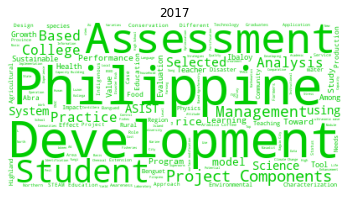

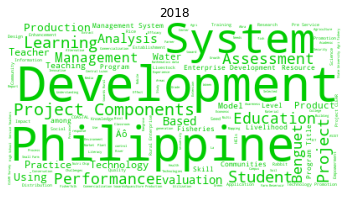

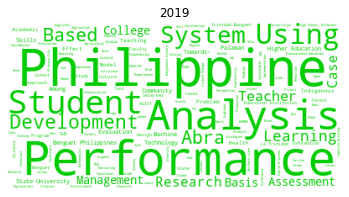

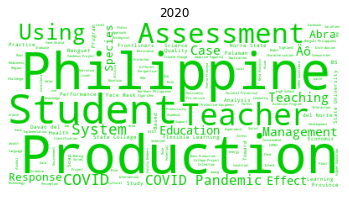

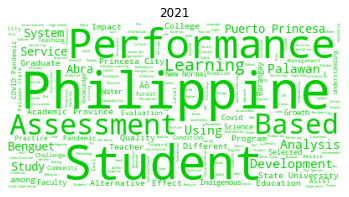

In [33]:
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 45.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(120, 100, 40)

for year in range(2017, 2022):
    wc_year = res_prop[res_prop['Year (YYYY)'] == year]
    try:
        wordcloud = (WordCloud(background_color='white',
                               color_func=random_color_func).generate(
            ' '.join(wc_year['Research Title'].dropna())))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.title(year)
        plt.show()
    except:
        pass

In [34]:
def filter_words(s):
    """ remove unnecessary words that do not give meaning to research title
    
    Parameters
    ----------
    s         :   pandas.Series
                  column to filter words
    
    Returns
    ----------
    filter_words  :   pandas.Series
                      cleaned words
    """
    # tokenize
    tokenize = s.apply(nltk.word_tokenize)

    # casefold
    lower_case = tokenize.apply(lambda x:
                                list(map(lambda y: y.casefold(), x)))


    # lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatize = lower_case.apply(lambda x: list(map(lemmatizer.lemmatize,
                                                             x)))

    # remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_stopwords = lemmatize.apply(lambda x:
                                          list(filter(lambda y: y
                                                      not in 
                                                      stop_words,
                                                      x)))

    # filter words with less than 3 character length
    filtered_words = filtered_stopwords.apply(lambda x:
                                               list(filter(lambda y:
                                                           len(y) > 3,
                                                           x)))
    
    # filter common words
    common_words = ['philippine', 'development', 'study', 'research', 
                   'used', 'based', 'student', 'teacher', 'using']
    filtered_words = filtered_words.apply(lambda x:
                                           list(filter(lambda y: y
                                                       not in 
                                                       common_words,
                                                       x)))

    return filtered_words.apply(lambda x: ' '.join(x))

In [35]:
res_prop['Research Title_clean'] = filter_words(res_prop['Research Title'])

### Overall

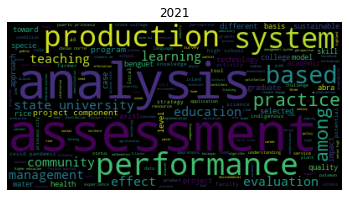

In [36]:
wordcloud = (WordCloud().generate(
    ' '.join(res_prop['Research Title_clean'].dropna())))
plt.imshow(wordcloud)
plt.axis("off")
plt.title(year)
plt.show()

### Yearly Research Titles

In [44]:
res_prop

,Team Member,Input Date,Research Title,Author,Keywords,Abstract,Year (YYYY),University (Full Name),University (Abbreviation),Campus,...,Local/International,"Allocated Budget (PH Pesos) 1,000,000.00",Source,Funding Agency,"Type\n(Grant, Commissioned)",Status \n(Completed/Ongoing),Notes,Topic,Topic Name,Research Title_clean
0,Patrick,2022-04-06,Disaster Risk Reduction and Long-Term Risk Res...,"Narisma, Gemma T.","long term disaster risk management strategy, d...",The CHED PHERNet-AdMU Program has been conduct...,2017.0,Ateneo de Manila University,ADMU,Main,...,NaN,10000000.0,External,CHED,Grant,Completed,NaN,-1.0,Outliers,disaster risk reduction long-term risk resilie...
1,Chris,2022-04-05,Antimycotic Activity Of Nostoc Linckia Specie...,"Paderes, Nero M.",antimycotic activity nostoc linckiamicrobiolog...,The warm tropical climate of the Philippines a...,2018.0,Abra State Institute of Science and Technology,ASIST,Main,...,NaN,NaN,NaN,NaN,NaN,Completed,NaN,5.0,CROP CULTIVATION,antimycotic activity nostoc linckia specie tin...
2,Chris,2022-04-05,Green Chemistry Perspective Among Stem 12 Seni...,"Paderes, Nero M.","clean green program, higher level knowledge su...",The study was conducted to determine the ‚ÄúGr...,2018.0,Abra State Institute of Science and Technology,ASIST,Main,...,NaN,NaN,NaN,NaN,NaN,Completed,NaN,1.0,EDUCATION,green chemistry perspective among stem senior ...
3,Chris,2022-04-05,Solid Waste Management System of Barangay Deet,"Bose, Ma. Digna T.","solid waste management term extent, solid wast...",This study aimed to establish a Solid Waste Ma...,2019.0,Abra State Institute of Science and Technology,ASIST,Main,...,NaN,NaN,NaN,NaN,NaN,Completed,NaN,8.0,GOVERNANCE / POLICY,solid waste management system barangay deet
4,Chris,2022-04-05,Multivariate Analysis on Tobacco Farming System,"Gannapao, Jubert S.;Guidang, Excel Philip B.;T...",multivariate analysis tobacco farming systemfa...,Farming systems refers to the utilization of t...,2018.0,Abra State Institute of Science and Technology,ASIST,Main,...,NaN,NaN,NaN,NaN,NaN,Completed,NaN,5.0,CROP CULTIVATION,multivariate analysis tobacco farming system
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,Miguel,2022-06-06,Scientific Learning Motivations as Predictors ...,"Legaspi, Jhay Mar E.; Perhiliana, Christian O....","scientific learning motivation, respondent sci...","Teachers, as life-long learners, hold personal...",2020.0,Quirino State University,QSU,Main,...,International,20000.0,Internal,QSU,Grant,Completed,NaN,NaN,NaN,scientific learning motivation predictor pre-s...
1275,Miguel,2022-06-06,Agricultural information system and communicat...,"delos Trinos, Cecilia H.; Dolojan, Fredisminda...","useful corn farming, bt corn grower amulong ca...",The study was conducted to assess the agricult...,2019.0,Quirino State University,QSU,Main,...,International,100000.0,External,CHED-DARE TO,Grant,Completed,NaN,NaN,NaN,agricultural information system communication ...
1276,Miguel,2022-06-06,Paperless Smart Classroom Attendance System Us...,"Ocumen, Carldwight O.; Bermusa, Jenefer P.; La...",system software implementation testing system ...,"As people's demand and lifestyle change, the d...",2019.0,Quirino State University,QSU,Main,...,International,10000.0,Internal,QSU,Grant,Completed,NaN,NaN,NaN,paperless smart classroom attendance system fi...
1277,Miguel,2022-06-06,Students' Grade Inquiry Kiosk Using Biometric ...,"Laranang, Mary Jane R.; Bermusa, Jenefer P.; P...","survey questionnaire performance system, stude...",Technological advancements have helped educato...,2019.0,Quirino State University,QSU,Main,...,International,10000.0,Internal,QSU,Grant,Completed,NaN,NaN,NaN,grade inquiry kiosk biometric fingerprint auth...


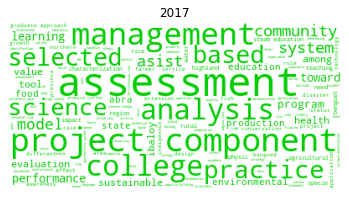

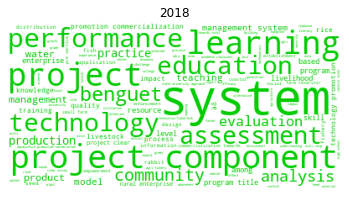

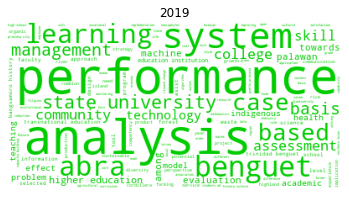

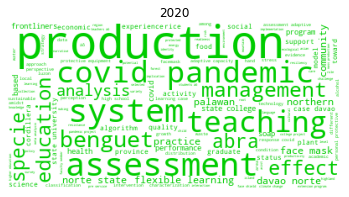

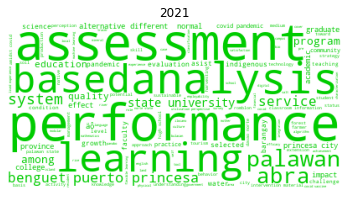

In [37]:
for year in range(2017, 2022):
    wc_year = res_prop[res_prop['Year (YYYY)'] == year]
    try:
        wordcloud = (WordCloud(background_color='white',
                               color_func=random_color_func).generate(
            ' '.join(wc_year['Research Title_clean'].dropna())))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.title(year)
        plt.show()
    except:
        pass

In [38]:
# initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(token_pattern=r'\b[a-z]+\b', 
                                   ngram_range=(1, 2),
                                   max_df=0.8,
                                   min_df=0.01)

# get bag of words representation
bow_title_all = dict()
for year in range(2017, 2022):
    wc_year = res_prop[res_prop['Year (YYYY)'] == year]
    clean_title = 'Research Title_clean'
    bow_title = tfidf_vectorizer.fit_transform(wc_year[clean_title])
    df_bow = pd.DataFrame.sparse.from_spmatrix(
                bow_title, columns=tfidf_vectorizer.get_feature_names_out())

    bow_title_all[year] = df_bow

In [39]:
def truncated_svd(X, n_components):
    """ Get the singular vectors and values of the design matrix
    Parameters
    ----------
    X         :  numpy.ndarray
                 design matrix
    Returns
    -------
    X_new             :  numpy.ndarray
                         truncated SVD
    nssd              :  numpy.ndarray
                         normalized sum of square distance from the origin
    """
    # initialize svd
    svd = TruncatedSVD(n_components=n_components, random_state=0)
    X_new = svd.fit_transform(X)
    p = svd.components_.T
    nssd = svd.explained_variance_ratio_.cumsum()

    return X_new, p, nssd





In [40]:
# loop thru all the selected categories
lsa = dict()
for year, bow in bow_title_all.items():
    X_new, p, nssd = truncated_svd(bow.to_numpy(), bow.shape[1] - 1)
    lsa[year] = {'X_new': X_new,
                 'p': p,
                 'nssd': nssd}

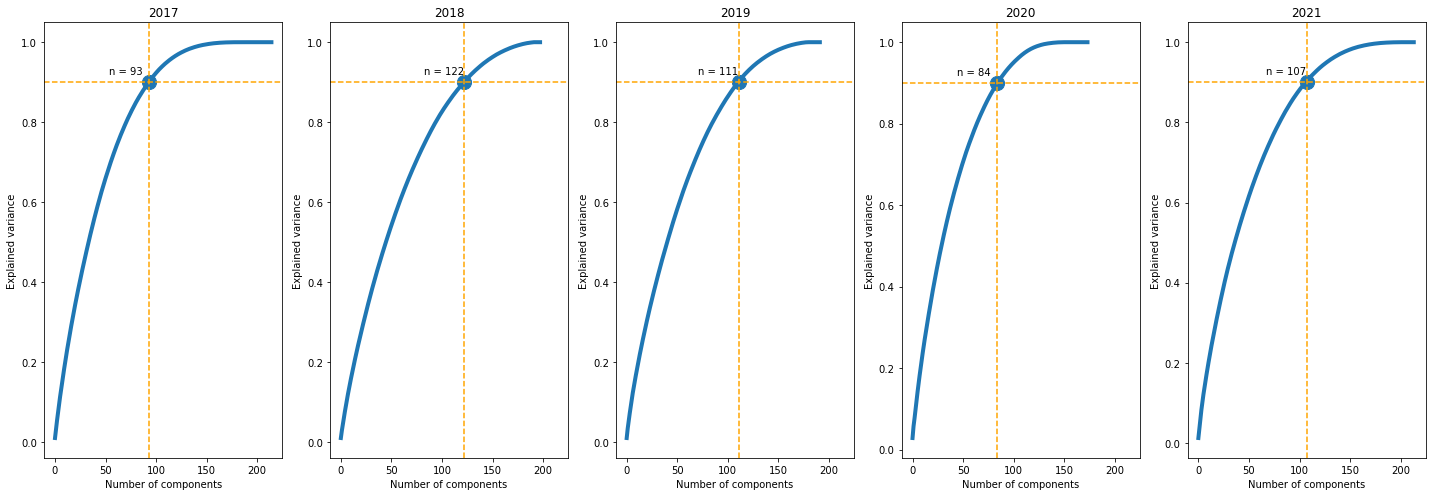

In [41]:
fig, axes = plt.subplots(1, 5, figsize=(20, 7), sharex=True)

for idx, year in enumerate(range(2017, 2022)):
    axes[idx].plot(lsa[year]['nssd'], lw=4)
    axes[idx].set_title(year)
    axes[idx].set_xlabel('Number of components')
    axes[idx].set_ylabel('Explained variance')
    axes[idx].axhline(0.9, ls='--', color='orange')
    # line on threshold
    thresh = (lsa[year]['nssd'] >= 0.9).argmax()
    axes[idx].axvline(thresh, ls='--', color='orange')
    
    # plot a point with text for better readability
    axes[idx].text(thresh - 40, 0.92, f'n = {thresh}')
    axes[idx].scatter(thresh, 0.9, s=200)

fig.tight_layout()
plt.show()
    

In [42]:
def plot_lsa(x, p, feat_names, title):
    """ Plots the reults of LSA
    Plots the following:
    axes[0]    :   scatter plots of first two singular vectors (SVs)
    axes[1]    :   Arrows with feature names that represents the weights 
                   of first two singular vectors (SVs)
    axes[2]    :   Bar plot of the first singular vector
    axes[3]    :   Bar plot of the second singular vector

    Parameters
    ----------
    x          :   numpy.ndarray
                   X_new from SVD 
    p          :   numpy.ndarray
                   principal components
    feat_names :   list 
                   feature names from the columns of BoW representation 
                   of our dataset
    """
    fig, axes = plt.subplots(1, 1)
    norm = ((p[:, 0] - p[:, 1])**2)
    ind = np.argsort(norm, axis=0)[-15:]
    for feature, vec in zip(feat_names.columns[ind], p[ind]):
        axes.arrow(0, 0, vec[0]*1.5, vec[1]*1.5, width=0.01, ec='none', 
                   color='green')
        axes.text(vec[0]*1.65, vec[1]*1.65, feature, ha='center',
                  fontsize=12)

    spines = ['right', 'top']
    [axes.spines[spine].set_visible(False) for spine in spines]
    axes.tick_params(axis='both', which='both', length=0)
    axes.set_xlabel('SV1', fontsize=14)
    axes.set_ylabel('SV2', fontsize=14)
    axes.set_title(title, fontsize=16)
    axes.tick_params(axis='x', labelsize=14)
    axes.tick_params(axis='y', labelsize=14)
    
    fig.tight_layout()

In [50]:
import pickle
with open('plots/fig_data/bow_title_all.pickle', 'wb') as f:
    pickle.dump(bow_title_all, f)


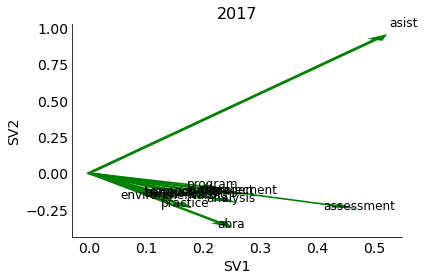

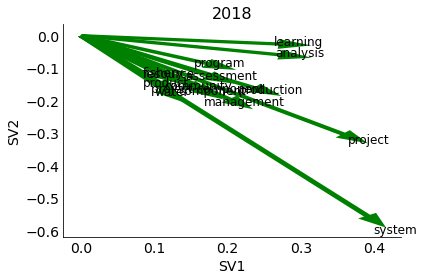

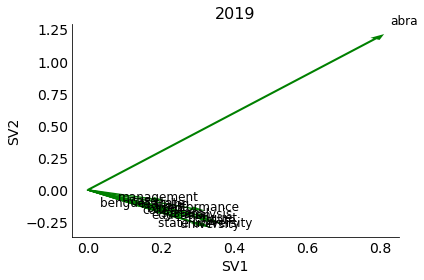

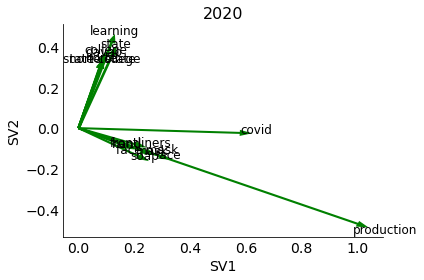

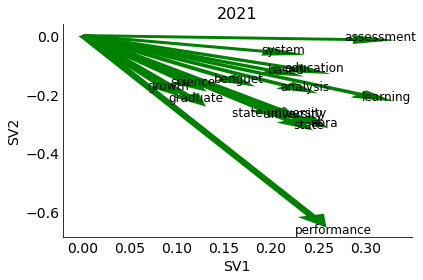

In [43]:
for year in range(2017, 2022):
    x = lsa[year]['X_new']
    p = lsa[year]['p']
    feat_names = bow_title_all[year]
    title = f'{year}'
    plot_lsa(x, p, feat_names, title)

## Author

Summary: 
- Most of the authors published only one research paper in their whole stay
- There are a number of co-authors to explore further for network analysis

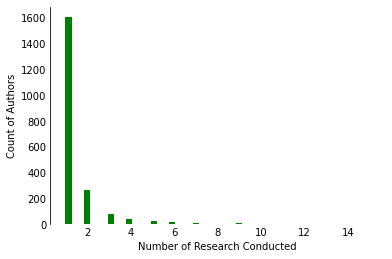

In [62]:
authors = res_prop.Author.str.split(';').explode()
# remove empty string
authors = authors[authors != '']
# plot histogram
auth_vals = authors.value_counts()
auth_vals.plot.hist(bins=50, color='green')
plt.tick_params(axis='both', which='both', length=0)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.gca().spines.bottom.set_visible(False)
# plt.title('Histogram of Number of Research performed by each Author')
plt.xlabel('Number of Research Conducted')
plt.ylabel('Count of Authors');

In [63]:
authors.value_counts()

Napadlet, Jones T.            15
Salvador-Amores, Analyn V.    13
Guidang, Excel Philip B.      12
Talledo, Maria Rebecca B.     12
Bagioan, Elsa D.              12
                              ..
Mutuc, Eugene B                1
Lacatan, Luisito L.            1
Piol, Elizalde L.              1
Fajardo,Reggie Rey C.          1
 Camayang, Arben Gibson G.     1
Name: Author, Length: 2072, dtype: int64

In [64]:
print('Print Statistics:')
display(authors.value_counts().describe())
print(f'''Author with most research entry ({authors.value_counts().max()}): 
         {authors.value_counts().idxmax()}''')

Print Statistics:


count    2072.000000
mean        1.493243
std         1.334804
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        15.000000
Name: Author, dtype: float64

Author with most research entry (15): 
         Napadlet, Jones T.


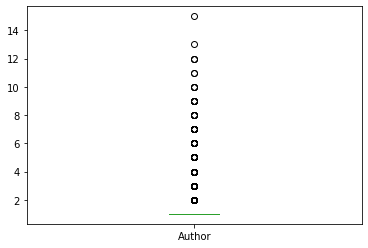

In [65]:
authors.value_counts().plot.box();

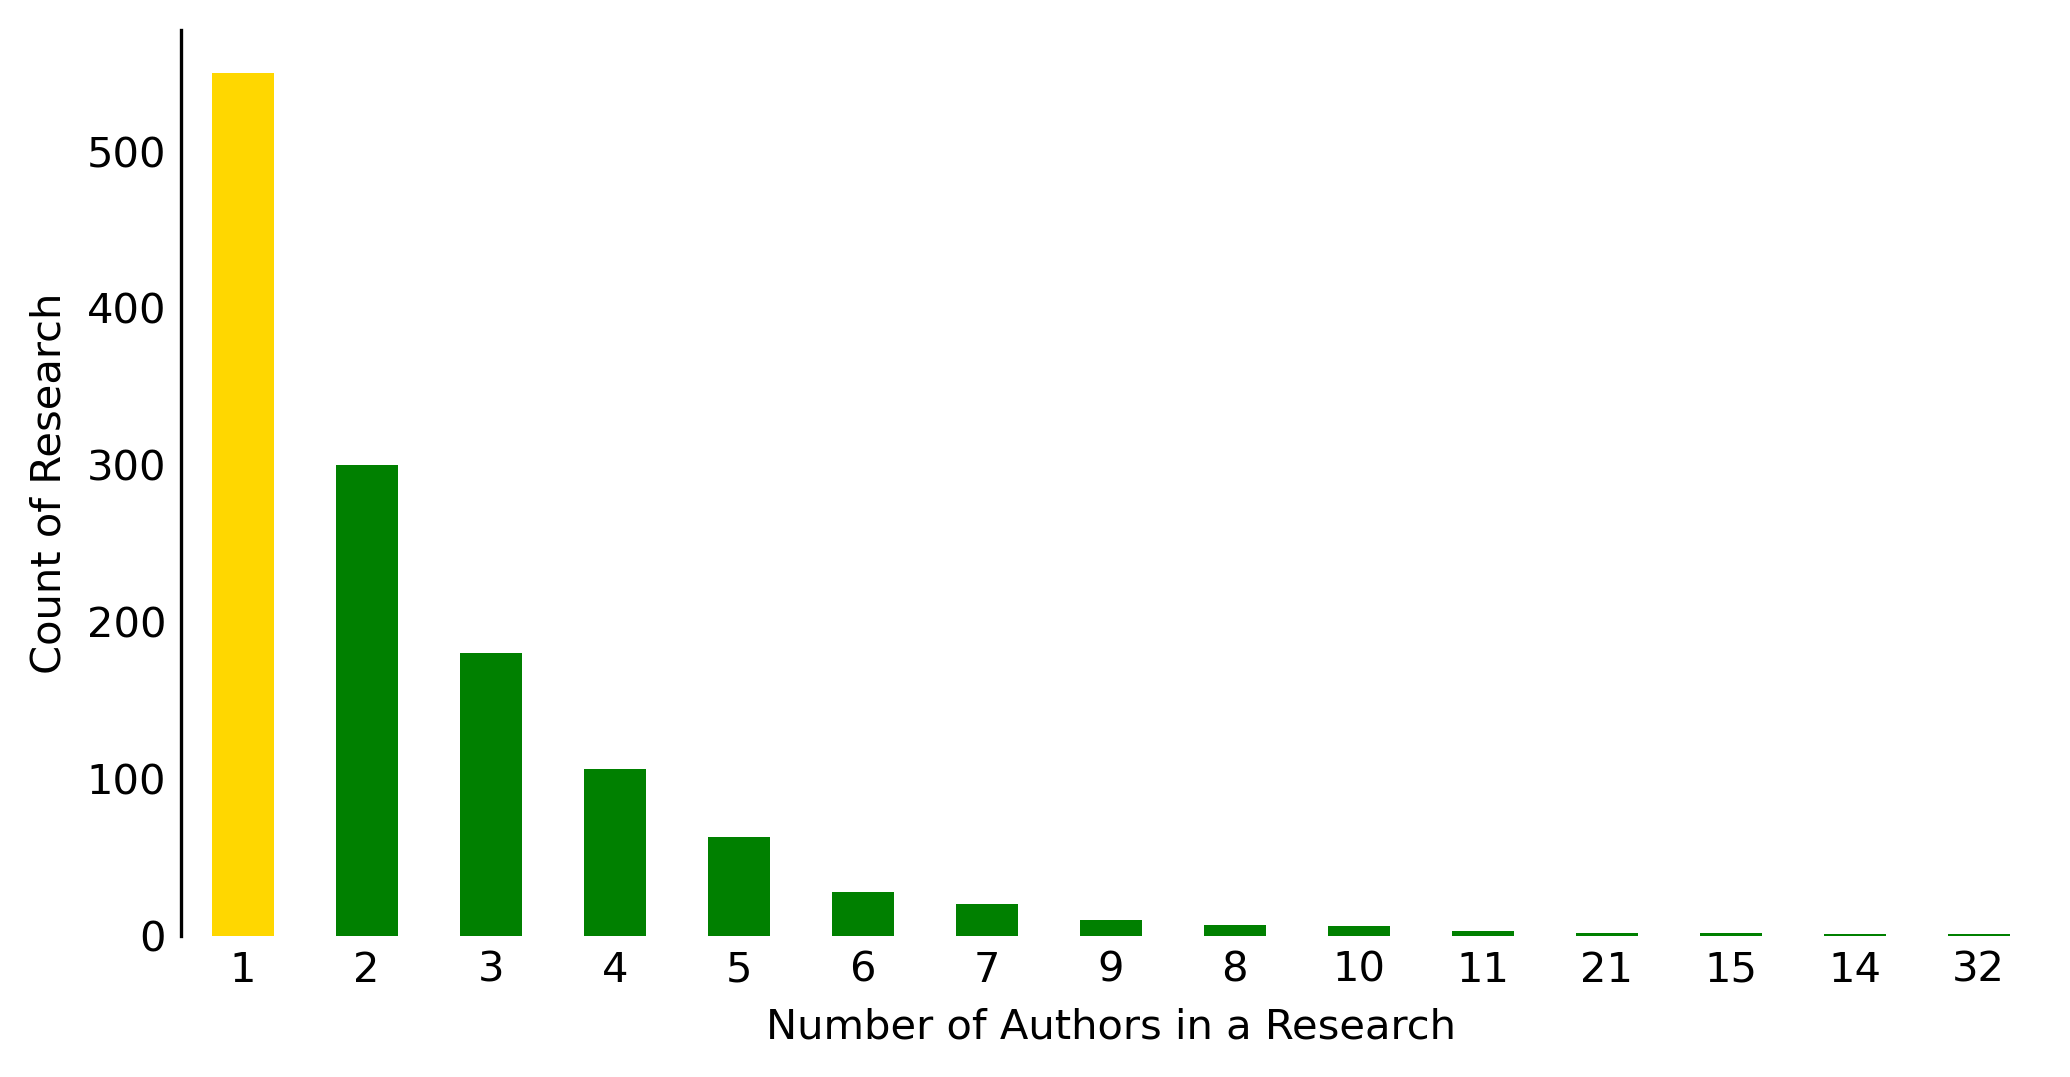

In [67]:
coauthor = res_prop.Author.str.split(';').apply(lambda x: [i for i in x if i])
coauthor = pd.DataFrame(coauthor)
coauthor['length'] = coauthor['Author'].str.len()
plt.figure(figsize=(8,4), dpi=300)
coauthor['length'].value_counts().plot.bar(color=['gold']+ ['green'] * (len(coauthor['length'].value_counts()) - 1))
plt.tick_params(axis='both', which='both', length=0)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.gca().spines.bottom.set_visible(False)
plt.xlabel('Number of Authors in a Research');
plt.ylabel('Count of Research');
plt.xticks(rotation = 0);
# plt.xlim([1, 15])
# plt.ylim([0, 200]);

In [10]:
coauthor = res_prop.Author.str.split(';').apply(lambda x: [i for i in x if i])
coauthor = pd.DataFrame(coauthor)
coauthor['length'] = coauthor['Author'].str.len()

coauthor['length'].value_counts()

1     550
2     300
3     180
4     106
5      63
6      28
7      20
9      10
8       7
10      6
11      3
21      2
15      2
14      1
32      1
Name: length, dtype: int64

In [39]:
coauthor

4       [Gannapao, Jubert S., Guidang, Excel Philip B....
5       [Balingit, Kae Ann Marie P., Pagluanan, Eusebi...
10           [Guidang, Excel Philip B., Gannapao, Jubert]
12        [De La Cruz, Joey M., Guidang, Excel Philip B.]
14      [Pagluanan, Eusebia R., Paras, Chieko Lun B., ...
                              ...                        
1274    [Legaspi, Jhay Mar E.,  Perhiliana, Christian ...
1275    [delos Trinos, Cecilia H.,  Dolojan, Fredismin...
1276    [Ocumen, Carldwight O.,  Bermusa, Jenefer P., ...
1277    [Laranang, Mary Jane R.,  Bermusa, Jenefer P.,...
1278    [Yra, Jay Francis P.,  Castillo, Rodrigo Jr. H...
Name: Author, Length: 729, dtype: object

In [23]:
print(f'Number of research with coauthors: {len(coauthor)}')

Number of research with coauthors: 729


In [24]:
def most_lift():
    """ 10 association rules with most lift 
    
    Returns
    =======
    most_lift    : list
                   list of tuples of consequent, antecent, and lift
    """
    df = pd.read_excel('pos_data.xlsx')
    db = df.groupby('BILL_ID')['ITEM_ID'].apply(set).to_list()
    out = fim.eclat(db, supp=1, conf=60, report='l', eval='l', target='r')
    out = sorted(out, key=lambda x: (-x[2], x[0], len(x[1])))
    return [(tuple(sorted(i[1])), i[0]) for i in out[:10]]

In [78]:
# Frequent itemset mining
coauthor = res_prop.Author.str.split(';').apply(lambda x: [i for i in x if i])
db = coauthor.apply(set).to_list()
fim_res = fim.apriori(db, supp=-3, zmin=2)

df_coauthor = pd.DataFrame(sorted(fim_res, key=lambda x: (-x[1], len(x[0]))), 
                           columns=['authors', 'count'])

display(df_coauthor)

,authors,count
0,"(Buot Jr., Inocencio E., Napadlet, Jones T.)",7
1,"(Lumbres, Roscinto Ian C., Doyog, Nova D.)",7
2,"(Doyog, Nova D., Lee, Young Jin)",7
3,"(Walitang, Denver I., Sa, Tongmin)",5
4,"(Flores, Josefina A., Talledo, Maria Rebecca B.)",4
5,"(Backian, Grace S., Meldoz, Dalen T.)",4
6,"(Edullantes, Christine Mae A., Gumanao, Girley...",4
7,"(Lagura, Glenne B., Decano, Ronald S.)",4
8,"(Lumbres, Roscinto Ian C., Lee, Young Jin)",4
9,"(Lumbres, Roscinto Ian C., Doyog, Nova D., Lee...",4


In [86]:
# Association pattern mining
out = fim.eclat(db, supp=-10, conf=30, report='l', eval='l', target='r')
df_coauthor = pd.DataFrame(sorted(out, key=lambda x: (-x[2], len(x[0]))), 
                           columns=['consequent', 'antecedent', 'lift'])

display(df_coauthor)

,consequent,antecedent,lift
0,"Lumbres, Roscinto Ian C.","(Doyog, Nova D.,)",110.600000
1,"Flores, Josefina A.","(Talledo, Maria Rebecca B.,)",105.333333
2,"Lee, Young Jin","(Doyog, Nova D.,)",98.311111
3,"Buot Jr., Inocencio E.","(Napadlet, Jones T.,)",84.266667


## Keywords

Summary: 
- Only 36% of the research topics have keywords attached to it; might be better not to use it

In [80]:
pct_present = 1 - len(res_prop.Keywords.dropna())/len(res_prop.Keywords)
print(f'Percentage of research papers with keywords: {pct_present * 100}')

Percentage of research papers with keywords: 36.7879746835443


## Abstract

Summary: 
- Only 42% of the research topics have abstract attached to it
- Focus on data-driven research
- Emergence of COVID-19 pandemic research in 2020

In [51]:
pct_present = 1 - len(res_prop.Abstract.dropna())/len(res_prop.Abstract)
print(f'Percentage of research papers with abstract: {pct_present * 100}')

Percentage of research papers with abstract: 40.969507427677875


In [52]:
res_prop['Abstract_clean'] = filter_words(res_prop['Abstract'].dropna())

In [61]:
import pickle
with open('plots/fig_data/bow_abstract_all.pickle', 'wb') as f:
    pickle.dump(bow_abstract_all, f)

### Overall

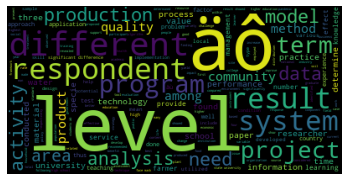

In [53]:
wordcloud = (WordCloud().generate(
    ' '.join(res_prop['Abstract_clean'].dropna())))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Yearly Abstract text

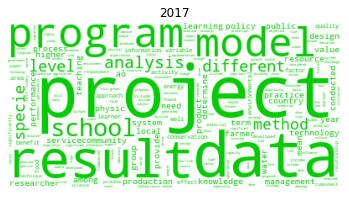

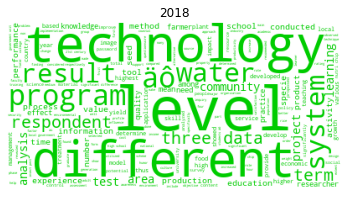

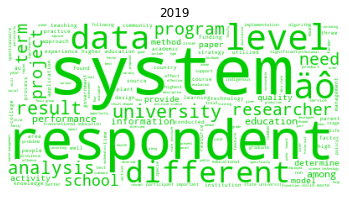

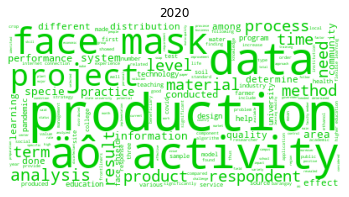

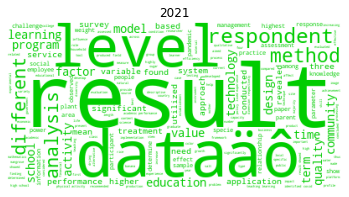

In [54]:
for year in range(2017, 2022):
    wc_year = res_prop[res_prop['Year (YYYY)'] == year]
    try:
        wordcloud = (WordCloud(background_color='white',
                               color_func=random_color_func).generate(
            ' '.join(wc_year['Abstract_clean'].dropna())))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.title(year)
        plt.show()
    except:
        pass

In [55]:
# initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(token_pattern=r'\b[a-z]+\b', 
                                   ngram_range=(1, 2),
                                   max_df=0.8,
                                   min_df=0.01)

# get bag of words representation
bow_abstract_all = dict()
for year in range(2017, 2022):
    wc_year = res_prop[res_prop['Year (YYYY)'] == year]
    clean_abs = 'Abstract_clean'
    bow_abstract = tfidf_vectorizer.fit_transform(wc_year[clean_abs].dropna())
    df_bow = pd.DataFrame.sparse.from_spmatrix(
                bow_abstract, 
                columns=tfidf_vectorizer.get_feature_names_out())

    bow_abstract_all[year] = df_bow

In [56]:
# loop thru all the selected categories
lsa_abs = dict()
for year, bow in tqdm(bow_abstract_all.items()):
    X_new, p, nssd = truncated_svd(bow.to_numpy(), 2)
    lsa_abs[year] = {'X_new': X_new,
                     'p': p,
                     'nssd': nssd}


100%|██████████| 5/5 [00:01<00:00,  3.66it/s]


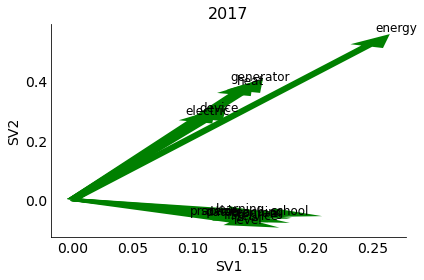

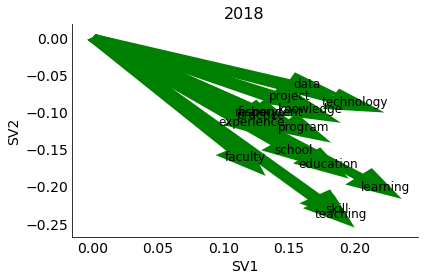

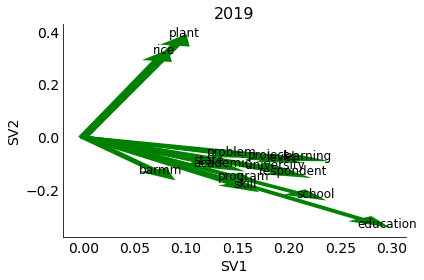

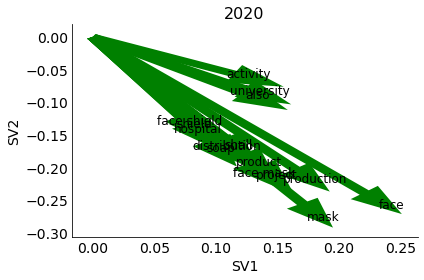

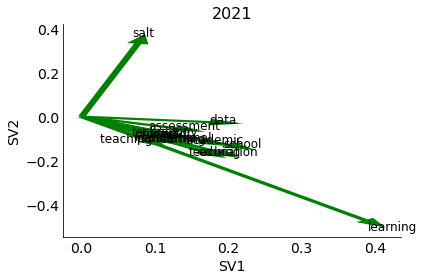

In [57]:
for year in range(2017, 2022):
    x = lsa_abs[year]['X_new']
    p = lsa_abs[year]['p']
    feat_names = bow_abstract_all[year]
    title = f'{year}'
    plot_lsa(x, p, feat_names, title)

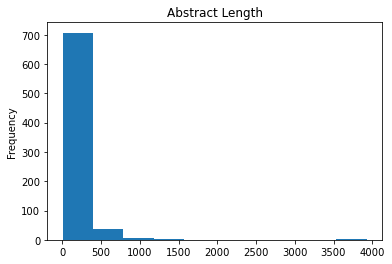

In [58]:
res_prop['Abstract'].dropna().str.split().str.len().plot.hist()
plt.title('Abstract Length');

References http://www.scholarpedia.org/article/Latent_semantic_analysis#:~:text=Latent%20semantic%20analysis%20(LSA)%20is,human%20language%20learning%20and%20understanding.